In [16]:
import numpy as np # For numerical fast numerical calculations
import matplotlib.pyplot as plt # For making plots
import pandas as pd # Deals with data
import seaborn as sb# Makes beautiful plots
from sklearn import preprocessing # Testing sklearn
import csv #csv files operation
import copy #for saving new data
import os # for reading from files 
import math # for mathematical functions 

In [17]:

# formula for magnitude for combining x,y,z into one point , condensing the data
def magnitude(activity):
    x2 = activity['x'] * activity['x']
    y2 = activity['y'] * activity['y']
    z2 = activity['z'] * activity['z']
    m2 = x2 + y2 + z2
    m = m2.apply(lambda x: math.sqrt(x))
    return m
    

In [18]:
from scipy.stats import skew, kurtosis
from statsmodels.tsa import stattools

def jitter(axis, start, end): #jitter is a signal formula for standard deviation 
    j = float(0)
    for i in range(int(start), min(int(end), axis.count())):
        if start != 0:
            j += abs(axis[i] - axis[i-1])
    return j / (int(end)-int(start))

def mean_crossing_rate(axis, start, end):
    cr = 0
    m = axis.mean()
    for i in range(int(start), min(int(end), axis.count())):
        if start != 0:
            p = axis[i-1] > m
            c = axis[i] > m
            if p != c:
                cr += 1
    return float(cr) / (end-start-1)

def window_summary(axis, start, end):
    acf = stattools.acf(axis[int(start):int(end)])
    acv = stattools.acovf(axis[int(start):int(end)])
    sqd_error = (axis[int(start):int(end)] - axis[int(start):int(end)].mean()) ** 2
    return [
        jitter(axis, start, end),     
        mean_crossing_rate(axis, start, end),
        axis[int(start):int(end)].mean(),
        axis[int(start):int(end)].std(),
        axis[int(start):int(end)].var(),
        axis[int(start):int(end)].min(),
        axis[int(start):int(end)].max(),
        acf.mean(), # mean auto correlation
        acf.std(), # standard deviation auto correlation
        acv.mean(), # mean auto covariance
        acv.std(), # standard deviation auto covariance
        skew(axis[int(start):int(end)]),   #if standard deviation is positive skew is descending,negative ascending and mean is balanced
        kurtosis(axis[int(start):int(end)]), # higher kurtosis is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.
        math.sqrt(sqd_error.mean())
    ]

def features(activity):
    for (start, end) in windows(timestamp['timestamp']):
        features = []
        for axis in ['x', 'y', 'z', 'M']:
            features += window_summary(activity[axis], start, end) # adding features to have the data more uniqueable distinctable
        yield features

In [19]:
import matplotlib
def windows(df, size=100):
    start = 0
    while start < df.count():
        yield start, start + size
        start += (size / 2)
#function for dividing in windows of data for a better distinction of data 

In [13]:
def plot_window(train_image):
    fig, ax = plt.subplots(nrows=1, figsize=(15, 3))
    plot_axis(ax, timestamp['timestamp'], train_image['M'], 'window')

    for (start, end) in windows(timestamp['timestamp']):
        ax.axvline(timestamp['timestamp'][start], color='r')
        
        # plotting function for windows

In [ ]:
def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
def plot_activity(activity):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
    plot_axis(ax0, timestamp['timestamp'], activity['x'], 'x Axis')
    plot_axis(ax1, timestamp['timestamp'], activity['y'], 'y Axis')
    plot_axis(ax2, timestamp['timestamp'], activity['z'], 'z Axis')
    plt.subplots_adjust(hspace=0.2)
    plt.show()
# displaying each x y z

In [ ]:
def plot_magnitudes(activities):
    plt.plot(timestamp['timestamp'], activities['M'])
    plt.subplots_adjust(hspace=0.2)
    plt.show()
    #veryfing the magnitude with visualization 

In [24]:
dataPath = "/Users/ASDERTY/Documents/date IA/"
path = '/Users/ASDERTY/Documents/date IA/train/'
pathTest = '/Users/ASDERTY/Documents/date IA/test/'

testedFile = []
train_images = []
test_images = []

COLUMNS = ['x', 'y', 'z'] # names for the columns for data clasyfing as x y z
train_labels = np.array(pd.read_csv("/Users/ASDERTY/Documents/date IA/"+ "train_labels.csv", header=None),dtype = 'uint8')
timp = ['timestamp'] # nameing timestamp for the interval of time of roughly 2 second for accelerometer using at windows and data
timestamp = pd.read_csv("/Users/ASDERTY/Desktop/pydata_2016-master/Data/" +"timp.csv" ,header=None,names = timp) 
timestamp = timestamp[:136]

for root,dirs,files in os.walk(path):
    for x in files:
        train_image = pd.read_csv(path + x, header=None,names = COLUMNS)
        train_image['M'] = magnitude(train_image) # inputing a new column with magnitude 
        train_image = train_image [:136] # taking the lowest number for each file to keep the files veridicity
        temp = []
        for f in features(train_image):
            temp.append(f)
        temp = np.array(temp)
        train_images.append(temp)
        
for root,dirs,files in os.walk(pathTest):
    testedFiles = files
    for x in files:
        test_image = pd.read_csv(pathTest + x, header=None,names=COLUMNS)
        test_image['M'] = magnitude(test_image)
        test_image = test_image[:136]
        temp = []
        for f in features(test_image):
            temp.append(f)
        temp = np.array(temp)
        test_images.append(temp)

train_images = np.array(train_images)
test_images = np.array(test_images)
print(train_images.shape)
print(test_images.shape)
filesGood = []
for x in testedFiles:
    filesGood.append(x.replace('.csv',''))

(9000, 3, 56)
(5000, 3, 56)


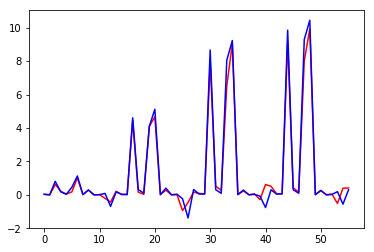

In [40]:
plt.plot(train_images[0][2],'r')
plt.plot(train_images[1][2],'b')
plt.show()

In [41]:
def normalize_data(test_data,type):
    if type == 'standard':
        print(test_data.shape)
        scaler = preprocessing.StandardScaler()       #methods of normalization of data
        scaler.fit(test_data)
        scaled_test_data = scaler.transform(test_data)
      #methods of normalization of data
        scaler.fit(test_data)
        scaled_test_data = scaler.transform(test_data)
    elif type == 'min_max':
        scaler = preprocessing.MinMaxScaler(feature_range=(-5,5))
        scaler.fit(test_data)
        scaled_test_data = scaler.transform(test_data)
    elif type == "l1":
        scaled_test_data = test_data/np.expand_dims(np.sum(abs(test_data),axis = 0),axis = 0)
    elif type == "l2":
        scaled_test_data = test_data/np.expand_dims(np.sqrt(np.sum(test_data**2,axis = 0)), axis = 0 )
    return scaled_test_data

<class 'numpy.ndarray'>
(9000, 168)
(9000, 168)
(5000, 168)


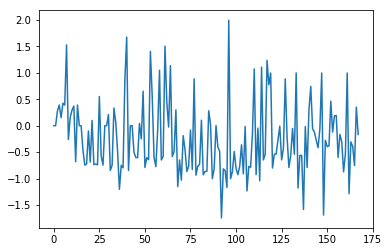

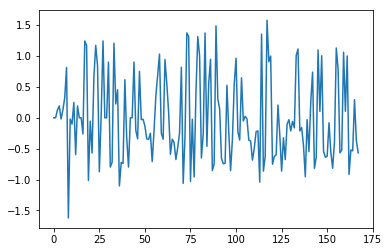

(9000, 168)
(9000, 168)
(5000, 168)


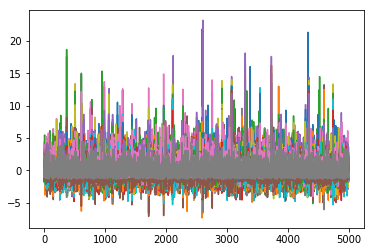

In [49]:
scaled_data = copy.deepcopy(train_images)
scaled_test = copy.deepcopy(test_images) #making a deep copy to have it unique to normalize
x = []
for z in range(0,scaled_data.shape[0]):
    x.append(scaled_data[z].flatten())
scaled_data = np.array(x)
x = []                                    #flattening the data to be able to scale it for faster speeds
for z in range(0,scaled_test.shape[0]):
    x.append(scaled_test[z].flatten())
scaled_test = np.array(x)
print(scaled_data.shape)
scaled_data = normalize_data(scaled_data,'standard')           
scaled_test = normalize_data(scaled_test,'standard')
print(scaled_data.shape)
print(scaled_test.shape)
plt.plot(scaled_test)
plt.show()

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100) # making esimations for feature importance to see what is needed 
model.fit(scaled_data,train_labels[:,[1]])
for x in range(168):
    print(str(model.feature_importances_[x]))

C:\Users\ASDERTY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.0
0.0
0.011638476473563262
0.005497656768553401
0.0048813006637555235
0.008940827959828927
0.012458485128827352
0.0028375210628611668
0.0031270295515601247
0.004300992826324761
0.0037848109059438976
0.0019782915726649607
0.0019894415972333355
0.005170679371418523
0.0
0.0
0.01790463970848284
0.0062693457369006
0.004913908850002181
0.013287345565655534
0.0176492657906368
0.003103563247416765
0.005010505015492588
0.0052091887014012895
0.004345724770484611
0.002926431728827612
0.0031147213611282133
0.006348792290275177
0.0
0.0
0.026757502102327402
0.006576917614481774
0.005554885013320161
0.010887848263969014
0.010769633828361174
0.0028235085395297878
0.0054083930165773385
0.006119918519234414
0.004578476256201325
0.003247239264174164
0.0044044463308694735
0.006068927676074841
0.0
0.0
0.04817138277581503
0.009784029407667132
0.007412862476019118
0.012286112746589082
0.014374168182745702
0.0032454189964800516
0.006988362613136266
0.007517137011258858
0.008607796306438091
0.003826805708816

In [72]:
from time import time

from keras.callbacks import TensorBoard
from keras import losses
from keras.regularizers import l1
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten

from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.layers import Input
from keras import optimizers
from keras.callbacks import TensorBoard #for tf board 
import keras # Imports keras

import tensorflow

model = Sequential ([
    Dense(140,input_shape=(168,)),
    Dense(180,activation = tensorflow.nn.relu), # my approach for the NN with a good number of perceptrons
    Dropout(0.2),
    Dense(180,activation = tensorflow.nn.relu),
    Dense(21, activation = 'softmax')
])
model.compile(optimizers.Nadam(0.001),loss=losses.poisson,metrics = ['accuracy'])
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 140)               23660     
_________________________________________________________________
dense_24 (Dense)             (None, 180)               25380     
_________________________________________________________________
dropout_6 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 180)               32580     
_________________________________________________________________
dense_26 (Dense)             (None, 21)                3801      
Total params: 85,421
Trainable params: 85,421
Non-trainable params: 0
_________________________________________________________________


In [74]:
from keras.utils import to_categorical
model.fit(scaled_data[:],
          to_categorical(train_labels[:,[1]].flatten()),
          batch_size = 72,validation_split = 0.2,
          epochs = 85,
          shuffle = True,
          verbose = 1,callbacks = [tensorboard]
         )

Train on 7200 samples, validate on 1800 samples
Epoch 1/85
7200/7200 [==============================] - 2s 233us/step - loss: 0.0927 - acc: 0.7225 - val_loss: 0.0673 - val_acc: 0.8706
Epoch 2/85
7200/7200 [==============================] - 1s 119us/step - loss: 0.0632 - acc: 0.8897 - val_loss: 0.0610 - val_acc: 0.9133
Epoch 3/85
7200/7200 [==============================] - 1s 126us/step - loss: 0.0588 - acc: 0.9201 - val_loss: 0.0588 - val_acc: 0.9233
Epoch 4/85
7200/7200 [==============================] - 1s 118us/step - loss: 0.0566 - acc: 0.9362 - val_loss: 0.0580 - val_acc: 0.9289
Epoch 5/85
7200/7200 [==============================] - 1s 119us/step - loss: 0.0550 - acc: 0.9453 - val_loss: 0.0568 - val_acc: 0.9350
Epoch 6/85
7200/7200 [==============================] - 1s 108us/step - loss: 0.0539 - acc: 0.9540 - val_loss: 0.0565 - val_acc: 0.9411
Epoch 7/85
7200/7200 [==============================] - 1s 112us/step - loss: 0.0528 - acc: 0.9626 - val_loss: 0.0558 - val_acc: 0.9483


Epoch 60/85
7200/7200 [==============================] - 1s 116us/step - loss: 0.0489 - acc: 0.9903 - val_loss: 0.0609 - val_acc: 0.9461
Epoch 61/85
7200/7200 [==============================] - 1s 124us/step - loss: 0.0491 - acc: 0.9900 - val_loss: 0.0621 - val_acc: 0.9444
Epoch 62/85
7200/7200 [==============================] - 1s 118us/step - loss: 0.0498 - acc: 0.9879 - val_loss: 0.0613 - val_acc: 0.9533
Epoch 63/85
7200/7200 [==============================] - 1s 109us/step - loss: 0.0494 - acc: 0.9910 - val_loss: 0.0598 - val_acc: 0.9561
Epoch 64/85
7200/7200 [==============================] - 1s 109us/step - loss: 0.0489 - acc: 0.9921 - val_loss: 0.0605 - val_acc: 0.9506
Epoch 65/85
7200/7200 [==============================] - 1s 109us/step - loss: 0.0492 - acc: 0.9906 - val_loss: 0.0591 - val_acc: 0.9539
Epoch 66/85
7200/7200 [==============================] - 1s 111us/step - loss: 0.0487 - acc: 0.9932 - val_loss: 0.0582 - val_acc: 0.9628
Epoch 67/85
7200/7200 [==================

In [65]:
import sklearn.metrics as metrics
rounded_predictions = model.predict_classes(scaled_data[0:3000],verbose = 1)
print(rounded_predictions)
print(metrics.accuracy_score(train_labels[0:3000,[1]],rounded_predictions))
print(metrics.confusion_matrix(train_labels[0:3000,[1]],rounded_predictions))

3000/3000 [==============================] - 0s 108us/step
[10 13  6 ...  3 20  5]
0.9306666666666666
[[169   0   0   0   0   1  12   0   0   2   0   0   0   0   0   0   0   0
    0   0]
 [  0 129   0  17   0   0   0   0   0   2   0   0   0   0   9   0   0   0
    0   0]
 [  0   0 164   0   0   0   0   0   0   0   0   1   6   0   0   0   0   0
    0   0]
 [  0   7   0 127   0   5   0   0   0   1   1   0   0   0   5   1   0   0
    0   3]
 [  0   0   0   0 130   0   0   0   0   0   0   0   5   0   0   0   0   0
    0   0]
 [  0   2   0   1   0 151   0   0   0   1   0   0   0   0   3   0   0   0
    0   0]
 [  3   0   0   0   0   1 112   0   0   3   0   0   0   0   2   0   0   2
    0   0]
 [  0   0   0   0   0   0   0 123   0   0   0   0   0  19   0   0   0   0
    0   0]
 [  0   0   2   0   3   0   0   0 144   0   0   0   1   0   0   0   2   0
    1   0]
 [  0   1   0   0   0   3   6   0   0 138   0   0   0   0   2   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 146   

In [66]:
import sklearn.metrics as metrics
rounded_predictions = model.predict_classes(scaled_data[3000:6000],verbose = 1)
print(rounded_predictions)
print(metrics.accuracy_score(train_labels[3000:6000,[1]],rounded_predictions))
print(metrics.confusion_matrix(train_labels[3000:6000,[1]],rounded_predictions))

3000/3000 [==============================] - 0s 72us/step
[ 6 20 14 ... 17 20  9]
0.94
[[125   0   0   0   0   0  10   0   0   3   0   0   0   0   0   0   0   0
    0   1]
 [  0 130   0  11   0   0   0   0   0   0   0   0   0   0   5   2   0   0
    0   1]
 [  0   0 128   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   5   0 136   0   3   0   0   0   1   1   0   0   0   9   0   0   0
    0   1]
 [  0   0   2   0 136   0   0   1   0   0   0   0   7   0   0   0   0   0
    0   0]
 [  0   0   0   1   0 140   0   0   0   3   0   0   0   0   0   0   0   0
    0   0]
 [  4   0   0   0   0   1 154   0   0   2   0   0   0   0   0   0   0   1
    0   0]
 [  0   0   0   0   0   0   0 134   0   0   0   0   0  17   0   0   0   0
    0   0]
 [  0   0   0   0   7   0   0   0 136   0   0   0   2   0   0   0   2   0
    4   0]
 [  0   0   0   0   0   2   4   0   0 140   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   1   0   0   0   0 155   0   0   0   0  

In [70]:
rounded_predictions = model.predict_classes(scaled_test,verbose = 1)

5000/5000 [==============================] - 1s 164us/step


### 

In [71]:
print(rounded_predictions)
print(dataPath)
print(len(rounded_predictions))
with open(dataPath + 'prezic.csv', mode='w', newline='') as sm: #creating a file for the test data 
    writer = csv.writer(sm, delimiter=',')
    writer.writerow(['id', 'class'])
    for i in range(5000):
        writer.writerow([filesGood[i],rounded_predictions[i]])

[ 3  4  5 ... 11  5  1]
/Users/ASDERTY/Documents/date IA/
5000
